# TFT pytorch model with baseline-v-0-raw.parquet
- The notebook is creating a model with sample data/code in Pytorch webpage
https://pytorch-forecasting.readthedocs.io/en/stable/_modules/pytorch_forecasting/models/temporal_fusion_transformer.html

Goal of the notebook
  - Create sample TFT model from data loading ~ prediction. 
  - Based on this notebook, the simple dataset in our study is applied to TFT model in the next notebook(link to be updated) 

- Edited by Rumi Nakagawa
- Spring 2023 Capstone


## Other references:
TFT with pytorch

1. https://pytorch-forecasting.readthedocs.io/en/stable/tutorials/stallion.html

2. https://pytorch-forecasting.readthedocs.io/en/stable/_modules/pytorch_forecasting/models/temporal_fusion_transformer.html

3. https://github.com/NVIDIA/DeepLearningExamples/tree/master/PyTorch/Forecasting/TFT#getting-the-data

4. https://towardsdatascience.com/temporal-fusion-transformer-time-series-forecasting-with-deep-learning-complete-tutorial-d32c1e51cd91

TFT with Tensorflow
1. https://github.com/greatwhiz/tft_tf2

2. https://towardsdatascience.com/temporal-fusion-transformer-googles-model-for-interpretable-time-series-forecasting-5aa17beb621


# 0. Preparation

## Mount google drive
- Make sure that available access is the user's own drive(no access across files in shared folder)

In [13]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [14]:
%cd drive/MyDrive/

[Errno 2] No such file or directory: 'drive/MyDrive/'
/content/drive/MyDrive


In [15]:
if 'google.colab' in str(get_ipython()):
  IN_COLLAB = True
else:
  IN_COLLAB = False

#TODO: CHANGE THIS BASED ON YOUR OWN LOCAL SETTINGS
# MY_HOME_ABS_PATH = "/content/drive/MyDrive/W210/co2-flux-hourly-gpp-modeling"
MY_HOME_ABS_PATH =  "/content/drive/MyDrive"

In [16]:
# This is already done above
# if IN_COLLAB:
#   from google.colab import drive
#   drive.mount('/content/drive/')

## Import libraries

In [17]:
import os
import warnings

warnings.filterwarnings("ignore")  # avoid printing out absolute paths
print(os.getcwd())
# os.chdir("../../..")

/content/drive/My Drive


#### (pip install)

In [18]:
!pip install pytorch_lightning

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 826.2/826.2 KB 40.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 517.2/517.2 KB 40.3 MB/s eta 0:00:00


In [19]:
!pip install pytorch_forecasting

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.4/141.4 KB 16.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.5/34.5 MB 40.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 308.2/308.2 KB 38.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.0/81.0 KB 12.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 210.5/210.5 KB 29.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 KB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 KB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.2/147.2 KB 20.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.7/112.7 KB 17.8 MB/s eta 0:00:00
  Created wheel for pyperclip: filename=pyperclip-1.8.2-py3-none-any.whl size=11136 sha256=a4e5bd3874e600fc3ea0689f33e592773a56bbe24

In [20]:
! pip install statsmodels --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 76.2 MB/s eta 0:00:00
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.12.2
    Uninstalling statsmodels-0.12.2:
      Successfully uninstalled statsmodels-0.12.2


In [21]:
# This is must in order to avoid error 
!pip install pytorch_lightning==1.9.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 825.8/825.8 KB 38.6 MB/s eta 0:00:00
  Attempting uninstall: pytorch_lightning
    Found existing installation: pytorch-lightning 1.9.2
    Uninstalling pytorch-lightning-1.9.2:
      Successfully uninstalled pytorch-lightning-1.9.2


numba may potentially needed later

In [22]:
!pip install numba

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [23]:
!pip install azure.storage.blob 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.2/383.2 KB 30.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 102.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.4/85.4 KB 14.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 174.5/174.5 KB 23.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.7/41.7 KB 5.3 MB/s eta 0:00:00


### pytorch libraries

In [24]:
import copy
from pathlib import Path
import warnings

import numpy as np
import pandas as pd
import pytorch_lightning as pl
from pytorch_lightning.callbacks import EarlyStopping, LearningRateMonitor
from pytorch_lightning.loggers import TensorBoardLogger
import torch

from pytorch_forecasting import Baseline, TemporalFusionTransformer, TimeSeriesDataSet
from pytorch_forecasting.data import GroupNormalizer
from pytorch_forecasting.metrics import SMAPE, PoissonLoss, QuantileLoss
from pytorch_forecasting.models.temporal_fusion_transformer.tuning import optimize_hyperparameters
from pytorch_forecasting import BaseModel, MAE

# Load data from Azure blob

In [25]:
MY_HOME_ABS_PATH

'/content/drive/MyDrive'

In [26]:
import sys
sys.path.append('/content/drive/MyDrive/.cred')
sys.path.append('/content/drive/MyDrive/tools')
sys.path.append('/content/drive/MyDrive/tools/CloudIO')

In [27]:
import os
os.environ["PYARROW_IGNORE_TIMEZONE"] = "1"
import math
import json

from calendar import monthrange
from datetime import datetime
from io import BytesIO

import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

# Load locale custome modules
import sys
if IN_COLLAB:
  os.chdir(MY_HOME_ABS_PATH)
  # sys.path.insert(0,os.path.abspath("./code/src/tools"))
  sys.path.insert(0,os.path.abspath("tools"))
else:
  sys.path.append(os.path.abspath("tools"))

from CloudIO.AzStorageClient import AzStorageClient
from data_pipeline_lib import *

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.5f' % x)
  

In [28]:
root_dir =  MY_HOME_ABS_PATH
tmp_dir =  root_dir + os.sep + '.tmp'
raw_data_dir = tmp_dir
data_dir = root_dir + os.sep + 'data'
cred_dir = root_dir + os.sep + '.cred'
az_cred_file = cred_dir + os.sep + 'azblobcred.json'

# if IN_COLLAB:
#   raw_data_dir = "/content/drive/MyDrive/CO2_flux_gpp_modeling/DS_capstone_23Spring_CO2/Data/half_hourly_data"

In [29]:
# Define target dataset
container = "baseline-data"
ext = "parquet"
# ver = "1"
# blob_name_base = f"baseline_all_v_{ver}"
# train_blob_name_base = f"baseline-train-v-{ver}"
# test_blob_name_base = f"baseline-test-v-{ver}"


In [30]:
# AzStorageClient.listBlobs(container)
container = "baseline-data"
cred_file = az_cred_file

In [31]:
from azure.storage.blob import BlobServiceClient

if os.path.exists(cred_file):
  connect_str = ""
  with open(cred_file, "rb") as f:
      data = json.load(f)
      connect_str = data['connectionstr']
      blob_svc_client = BlobServiceClient.from_connection_string(connect_str)
      tokens = connect_str.split(';')
      for t in tokens:
        if "AccountName=" in t:
          AccountName = t[len("AccountName="):]
        elif "AccountKey=" in t:
          AccountKey = t[len("AccountKey="):]

In [32]:
# Container and file name
container = "baseline-data"
blob_name_train = "baseline-train-v-0-raw.parquet"
blob_name_val = "baseline-test-v-0-raw.parquet"

In [33]:
# Download the parquet file if there is not local copy
# ref: https://stackoverflow.com/a/68940709

train_df = None
if not (os.path.exists(tmp_dir+blob_name_train)):
    # Initialized Azure Storage Client
    azStorageClient = AzStorageClient(az_cred_file)
    # Download blob to stream
    file_stream = azStorageClient.downloadBlob2Stream(container, blob_name_train)
    # read parquet
    train_df = pd.read_parquet(file_stream, engine='pyarrow')
    train_df.to_parquet(tmp_dir + blob_name_train)
else:
    train_df = pd.read_parquet(tmp_dir + blob_name_train)

print(f"size: {train_df.shape}")
train_df.head()

size: (1485926, 33)


,GPP_NT_VUT_REF,TA_ERA,SW_IN_ERA,LW_IN_ERA,VPD_ERA,P_ERA,PA_ERA,datetime,year,month,day,hour,date,EVI,NDVI,NIRv,b1,b2,b3,b4,b5,b6,b7,IGBP,koppen,minute,site_id,elevation,lat,long,koppen_sub,c3c4,c4_percent
16228,-0.53574,5.31100,25.01600,272.21800,1.70800,0.00000,97.93900,2001-01-01 08:30:00,2001,1,1,8,2001-01-01,0.24998,0.73349,0.10592,0.02220,0.14440,0.00740,0.02670,0.14860,0.09770,0.00000,EBF,Temperate,30,FR-Pue,270.00000,43.74130,3.59570,8,C3,6.59000
16229,0.86438,5.74400,59.73400,272.21800,1.73800,0.00000,97.93900,2001-01-01 09:00:00,2001,1,1,9,2001-01-01,0.24998,0.73349,0.10592,0.02220,0.14440,0.00740,0.02670,0.14860,0.09770,0.00000,EBF,Temperate,0,FR-Pue,270.00000,43.74130,3.59570,8,C3,6.59000
16230,-0.02627,6.17600,91.23500,272.21800,1.76700,0.00000,97.93900,2001-01-01 09:30:00,2001,1,1,9,2001-01-01,0.24998,0.73349,0.10592,0.02220,0.14440,0.00740,0.02670,0.14860,0.09770,0.00000,EBF,Temperate,30,FR-Pue,270.00000,43.74130,3.59570,8,C3,6.59000
16231,-0.17229,6.60800,79.26400,333.93300,1.79700,0.05000,97.93900,2001-01-01 10:00:00,2001,1,1,10,2001-01-01,0.24998,0.73349,0.10592,0.02220,0.14440,0.00740,0.02670,0.14860,0.09770,0.00000,EBF,Temperate,0,FR-Pue,270.00000,43.74130,3.59570,8,C3,6.59000
16232,1.20865,7.04300,94.92900,333.93300,1.81700,0.00000,97.92300,2001-01-01 10:30:00,2001,1,1,10,2001-01-01,0.24998,0.73349,0.10592,0.02220,0.14440,0.00740,0.02670,0.14860,0.09770,0.00000,EBF,Temperate,30,FR-Pue,270.00000,43.74130,3.59570,8,C3,6.59000


In [34]:

validation_df = None
if not (os.path.exists(tmp_dir+blob_name_val)):
    # Initialized Azure Storage Client
    azStorageClient = AzStorageClient(az_cred_file)
    # Download blob to stream
    file_stream = azStorageClient.downloadBlob2Stream(container, blob_name_val)
    # read parquet
    validation_df = pd.read_parquet(file_stream, engine='pyarrow')
    validation_df.to_parquet(tmp_dir + blob_name_val)
else:
    validation_df = pd.read_parquet(tmp_dir + blob_name_val)

print(f"size: {validation_df.shape}")
validation_df.head()

size: (559201, 33)


,GPP_NT_VUT_REF,TA_ERA,SW_IN_ERA,LW_IN_ERA,VPD_ERA,P_ERA,PA_ERA,datetime,year,month,day,hour,date,EVI,NDVI,NIRv,b1,b2,b3,b4,b5,b6,b7,IGBP,koppen,minute,site_id,elevation,lat,long,koppen_sub,c3c4,c4_percent
133428,2.19090,4.66000,5.44900,218.92000,2.90400,0.00000,100.76500,2001-01-01 07:30:00,2001,1,1,7,2001-01-01,0.30272,0.74517,0.12452,0.02440,0.16710,0.01800,0.02910,0.23520,0.09770,0.04840,EBF,Temperate,30,IT-Cpz,68.00000,41.70525,12.37611,8,C3,0.00000
133429,2.83647,5.08600,71.31800,218.92000,2.95200,0.00000,100.78900,2001-01-01 08:00:00,2001,1,1,8,2001-01-01,0.30272,0.74517,0.12452,0.02440,0.16710,0.01800,0.02910,0.23520,0.09770,0.04840,EBF,Temperate,0,IT-Cpz,68.00000,41.70525,12.37611,8,C3,0.00000
133430,4.03906,5.51100,132.32000,218.92000,3.00000,0.00000,100.81300,2001-01-01 08:30:00,2001,1,1,8,2001-01-01,0.30272,0.74517,0.12452,0.02440,0.16710,0.01800,0.02910,0.23520,0.09770,0.04840,EBF,Temperate,30,IT-Cpz,68.00000,41.70525,12.37611,8,C3,0.00000
133431,7.79772,5.93700,187.41100,218.92000,3.04800,0.00000,100.83700,2001-01-01 09:00:00,2001,1,1,9,2001-01-01,0.30272,0.74517,0.12452,0.02440,0.16710,0.01800,0.02910,0.23520,0.09770,0.04840,EBF,Temperate,0,IT-Cpz,68.00000,41.70525,12.37611,8,C3,0.00000
133432,6.93281,6.36200,235.65000,218.92000,3.09600,0.00000,100.86100,2001-01-01 09:30:00,2001,1,1,9,2001-01-01,0.30272,0.74517,0.12452,0.02440,0.16710,0.01800,0.02910,0.23520,0.09770,0.04840,EBF,Temperate,30,IT-Cpz,68.00000,41.70525,12.37611,8,C3,0.00000


In [35]:
type(train_df)

pandas.core.frame.DataFrame

# Data Preprocessing

## Overview of the dataset

In [36]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1485926 entries, 16228 to 2021172
Data columns (total 33 columns):
 #   Column          Non-Null Count    Dtype         
---  ------          --------------    -----         
 0   GPP_NT_VUT_REF  1485926 non-null  float64       
 1   TA_ERA          1485926 non-null  float64       
 2   SW_IN_ERA       1485926 non-null  float64       
 3   LW_IN_ERA       1485926 non-null  float64       
 4   VPD_ERA         1485926 non-null  float64       
 5   P_ERA           1485926 non-null  float64       
 6   PA_ERA          1485926 non-null  float64       
 7   datetime        1485926 non-null  datetime64[ns]
 8   year            1485926 non-null  int64         
 9   month           1485926 non-null  int64         
 10  day             1485926 non-null  int64         
 11  hour            1485926 non-null  int64         
 12  date            1485926 non-null  datetime64[ns]
 13  EVI             1485926 non-null  float64       
 14  NDVI          

In [37]:
train_df.describe()

,GPP_NT_VUT_REF,TA_ERA,SW_IN_ERA,LW_IN_ERA,VPD_ERA,P_ERA,PA_ERA,year,month,day,hour,EVI,NDVI,NIRv,b1,b2,b3,b4,b5,b6,b7,minute,elevation,lat,long,koppen_sub,c4_percent
count,1485926.00000,1485926.00000,1485926.00000,1485926.00000,1485926.00000,1485926.00000,1485926.00000,1485926.00000,1485926.00000,1485926.00000,1485926.00000,1485926.00000,1485926.00000,1485926.00000,1485926.00000,1485926.00000,1485926.00000,1485926.00000,1485926.00000,1485926.00000,1485926.00000,1485926.00000,1485926.00000,1485926.00000,1485926.00000,1485926.00000,1485926.00000
mean,5.86211,14.87724,377.56323,316.15936,10.11574,0.03757,90.79849,2009.75172,6.53593,15.74438,11.89376,0.29739,0.53815,0.13063,0.07894,0.24123,0.04288,0.07109,0.25797,0.20036,0.11929,14.99925,971.07777,41.75447,-62.35813,16.51431,8.82611
std,7.52193,9.04516,268.53741,47.26856,9.61817,0.18091,8.84375,4.52259,2.98991,8.81076,3.77390,0.13132,0.21932,0.07137,0.05540,0.06086,0.03907,0.04160,0.06960,0.09369,0.07861,15.00001,866.88847,7.77408,59.15444,8.71496,15.99510
min,-49.73720,-29.74000,0.00100,142.77000,0.00000,0.00000,67.40500,2001.00000,1.00000,1.00000,3.00000,-0.11958,-0.18252,-0.01715,0.00540,0.03050,0.00000,0.00000,0.00000,0.01320,0.00000,0.00000,129.00000,31.73650,-121.55740,6.00000,0.00000
25%,0.45157,8.69200,138.70625,283.86900,3.18000,0.00000,85.24200,2006.00000,4.00000,8.00000,9.00000,0.20336,0.34150,0.08147,0.03370,0.19840,0.01960,0.04220,0.20210,0.11890,0.05150,0.00000,234.00000,36.60580,-110.86610,8.00000,0.00000
50%,3.23428,14.93100,344.52850,317.35000,6.98700,0.00000,93.16700,2010.00000,7.00000,16.00000,12.00000,0.28756,0.56813,0.11822,0.06390,0.23080,0.03400,0.06320,0.26110,0.18680,0.10330,0.00000,689.00000,40.03290,-97.48880,14.00000,0.04000
75%,9.48720,21.28200,587.46300,349.28900,13.73200,0.00000,98.71700,2013.00000,9.00000,23.00000,15.00000,0.36012,0.70597,0.15872,0.11660,0.27750,0.05450,0.09120,0.31520,0.27910,0.18240,30.00000,1531.00000,45.55980,3.59570,26.00000,10.72000
max,85.03090,42.58700,1094.34100,473.01100,75.68400,15.49300,103.38300,2020.00000,12.00000,31.00000,23.00000,2.38835,0.93551,0.42385,0.79710,0.77290,0.76890,0.78650,0.46660,0.42800,0.35730,30.00000,3050.00000,61.84741,24.29477,27.00000,55.39000


## Check NaN values in the dataframe

In [38]:
train_df.isna().sum()

GPP_NT_VUT_REF    0
TA_ERA            0
SW_IN_ERA         0
LW_IN_ERA         0
VPD_ERA           0
P_ERA             0
PA_ERA            0
datetime          0
year              0
month             0
day               0
hour              0
date              0
EVI               0
NDVI              0
NIRv              0
b1                0
b2                0
b3                0
b4                0
b5                0
b6                0
b7                0
IGBP              0
koppen            0
minute            0
site_id           0
elevation         0
lat               0
long              0
koppen_sub        0
c3c4              0
c4_percent        0
dtype: int64

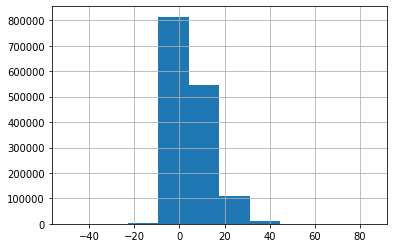

In [39]:
# Check distribution of specifica data
# This was done when the GroupNormalizer caused error. 
  # Error message showed NaN/ infinite number in GPP, while there were neither NA nor infinite values
  # Error was solved by using default(best normalizer was automatically assigned)
train_df['GPP_NT_VUT_REF'].hist()

## Add time index to df

- `time_idx` determines the sequence of samples. This is used in TS dataset in pytorch. It is also used to make aggregated static features easier when there are multiple observations with same time point. 

- We could also create categorical features by using average or convert time features to categorical features(Ex. month)

In [40]:
# Slim down features to make a model simpler
train_df = train_df[['GPP_NT_VUT_REF', 'site_id','datetime','month','hour',
                   'TA_ERA', 'SW_IN_ERA', 'LW_IN_ERA', 'VPD_ERA','P_ERA', 'PA_ERA',
                   'EVI', 'NDVI', 'NIRv', 'b1', 'b2', 'b3', 'b4', 'b5', 'b6', 'b7', 
                   'elevation', 'lat', 'long'
                   ]] 
train_df = train_df[train_df['site_id'] == 'FR-Pue']



- For Indexing, using `Series.rank` looks the best and fastest!

In [41]:
# Add time index

# Code from sample data
# data_df["time_idx"] = data_df["year"]*24*30* + data_df["month"]*24*30 + data_df["day"]*24 + data_df["hour"]# year times 12 + month and find the time "ID"
# data_df["time_idx"] -= data_df["time_idx"].min() # substract minimum "ID" from the original to reduce the magnitude of IDs  

# Train df
train_df["time_idx"] = train_df['datetime'].rank(method='dense').sub(1).astype(int)

# Show some time values in earlier/middle/later values of indices
print(f'time index = 0 {train_df[train_df["time_idx"] == 0]["datetime"]}')
print("")
print(f'time index = 1 {train_df[train_df["time_idx"] == 1]["datetime"]}')
print("")
print(f'time index = mean({int(train_df["time_idx"].mean())}) {train_df[train_df["time_idx"] == int(train_df["time_idx"].mean())]["datetime"]}')
print("")
print(f'time index = max({int(train_df["time_idx"].median())}) {train_df[train_df["time_idx"] == int(train_df["time_idx"].median())]["datetime"]}')
print("")
print(f'time index = max({int(train_df["time_idx"].max())}) {train_df[train_df["time_idx"] == int(train_df["time_idx"].max())]["datetime"]}')

# validation df
validation_df["time_idx"] = validation_df['datetime'].rank(method='dense').sub(1).astype(int)

# Show some time values in earlier/middle/later values of indices
print(f'time index = 0 {validation_df[validation_df["time_idx"] == 0]["datetime"]}')
print("")
print(f'time index = 1 {validation_df[validation_df["time_idx"] == 1]["datetime"]}')
print("")
print(f'time index = mean({int(validation_df["time_idx"].mean())}) {validation_df[validation_df["time_idx"] == int(validation_df["time_idx"].mean())]["datetime"]}')
print("")
print(f'time index = max({int(validation_df["time_idx"].median())}) {validation_df[validation_df["time_idx"] == int(validation_df["time_idx"].median())]["datetime"]}')
print("")
print(f'time index = max({int(validation_df["time_idx"].max())}) {validation_df[validation_df["time_idx"] == int(validation_df["time_idx"].max())]["datetime"]}')


# Code sample from sample data(We might want to use average data data)
# add additional features
# data_df["month"] = data_df.date.dt.month.astype(str).astype("category")  # categories have be strings
# data_df["log_volume"] = np.log(data_df.volume + 1e-8)
# data_df["avg_volume_by_sku"] = data_df.groupby(["time_idx", "sku"], observed=True).volume.transform("mean")
# data_df["avg_volume_by_agency"] = data_df.groupby(["time_idx", "agency"], observed=True).volume.transform("mean")

# we want to encode special days as one variable and thus need to first reverse one-hot encoding
# special_days = [
#     "easter_day",
#     "good_friday",
#     "new_year",
#     "christmas",
#     "labor_day",
#     "independence_day",
#     "revolution_day_memorial",
#     "regional_games",
#     "fifa_u_17_world_cup",
#     "football_gold_cup",
#     "beer_capital",
#     "music_fest",
# ]
# data_df[special_days] = data_df[special_days].apply(lambda x: x.map({0: "-", 1: x.name})).astype("category")
# data_df.sample(10, random_state=521)

time index = 0 16228   2001-01-01 08:30:00
Name: datetime, dtype: datetime64[ns]

time index = 1 16229   2001-01-01 09:00:00
Name: datetime, dtype: datetime64[ns]

time index = mean(58599) 74827   2007-10-28 15:00:00
Name: datetime, dtype: datetime64[ns]

time index = max(58599) 74827   2007-10-28 15:00:00
Name: datetime, dtype: datetime64[ns]

time index = max(117199) 133427   2014-12-31 16:30:00
Name: datetime, dtype: datetime64[ns]
time index = 0 133428   2001-01-01 07:30:00
Name: datetime, dtype: datetime64[ns]

time index = 1 133429   2001-01-01 08:00:00
Name: datetime, dtype: datetime64[ns]

time index = mean(92395) 227754    2011-08-06 14:30:00
823974    2011-08-06 14:30:00
867071    2011-08-06 14:30:00
1168788   2011-08-06 14:30:00
1836647   2011-08-06 14:30:00
Name: datetime, dtype: datetime64[ns]

time index = max(89711) 821385    2011-05-12 12:30:00
864614    2011-05-12 12:30:00
1167112   2011-05-12 12:30:00
1834185   2011-05-12 12:30:00
Name: datetime, dtype: datetime64[ns]

In [42]:
# count = 0
# for i in train_df['time_idx']:
#   if count != i:
#     print(i)
#     count += 2
#   count +=1
# train_df = train_df.iloc[:19,:]

## Define cutoff of train - validation

In [46]:
# (data is already splited to train/validation set)
max_prediction_length = 1
max_encoder_length = 1000

training_cutoff = train_df["time_idx"].max() - max_prediction_length
training_cutoff

117198

## Convert to TS dataset

**Some key variables**

`group_ids` (List[str])

- list of column names identifying a time series. This means that the group_ids identify a sample together with the time_idx. If you have only one timeseries, set this to the name of column that is constant.

`allow_missing_timesteps=True` 

- if to allow missing timesteps that are automatically filled up. Missing values refer to gaps in the time_idx, e.g. if a specific timeseries has only samples for 1, 2, 4, 5, the sample for 3 will be generated on-the-fly. Allow missings does not deal with NA values. You should fill NA values before passing the dataframe to the TimeSeriesDataSet.


`static_categoricals`

`static_reals`

- `reals` - continuous variable

`time_varying_known_categoricals`

`variable_groups`

```
`variable_groups` ={"special_days": special_days},  # group of categorical variables can be treated as one variable
```

`time_varying_known_reals`

- months and hours are includd in `time_varying_known_reals`

`time_varying_unknown_categoricals`

`time_varying_unknown_reals`

`target_normalizer`

- target_normalizer (Union[TorchNormalizer, NaNLabelEncoder, EncoderNormalizer, str, list, tuple]) – transformer that take group_ids, target and time_idx to normalize targets. You can choose from TorchNormalizer, GroupNormalizer, NaNLabelEncoder, EncoderNormalizer (on which overfitting tests will fail) or None for using no normalizer. For multiple targets, use a :py:class`~pytorch_forecasting.data.encoders.MultiNormalizer`. By default an appropriate normalizer is chosen automatically.

- Note: Example used `GroupNormalizer(groups=["agency","sku"], transformation="softplus")` and commented "use softplus and normalize by group", however we will receive error if is use `GroupNormalizer`. For baseline I used default(pytorch doc sayes `By default an appropriate normalizer is chosen automatically`) and avoided error.
  - https://github.com/jdb78/pytorch-forecasting/issues/1201




(TS parameters to be updated on Sunday)

In [47]:
train_df.columns

Index(['GPP_NT_VUT_REF', 'site_id', 'datetime', 'month', 'hour', 'TA_ERA',
       'SW_IN_ERA', 'LW_IN_ERA', 'VPD_ERA', 'P_ERA', 'PA_ERA', 'EVI', 'NDVI',
       'NIRv', 'b1', 'b2', 'b3', 'b4', 'b5', 'b6', 'b7', 'elevation', 'lat',
       'long', 'time_idx'],
      dtype='object')

In [48]:
training = TimeSeriesDataSet(
    # limit training 
    train_df,# data_df[lambda x: x.time_idx <= training_cutoff], 
    # time index is used as input to create TS dataset
    time_idx="time_idx",
    target="GPP_NT_VUT_REF",
    group_ids=["site_id"],
    allow_missing_timesteps=True,
    min_encoder_length=max_encoder_length // 2,  # keep encoder length long (as it is in the validation set)
    max_encoder_length=max_encoder_length,
    min_prediction_length=1,
    max_prediction_length=max_prediction_length,
    static_categoricals=["site_id"],
    static_reals=['lat', 'long'],
    time_varying_known_categoricals=[],
    # variable_groups={"special_days": special_days},  # group of categorical variables can be treated as one variable
    time_varying_known_reals=["time_idx", "month", "hour"],
    time_varying_unknown_categoricals=[],
    time_varying_unknown_reals=[
        'GPP_NT_VUT_REF', 'TA_ERA', 'SW_IN_ERA', 'LW_IN_ERA', 'VPD_ERA',
        'P_ERA', 'PA_ERA', 'EVI', 'NDVI', 'NIRv',
        'b1', 'b2', 'b3', 'b4', 'b5', 'b6', 'b7', 'elevation'],
    #     "volume",
    #     "log_volume",
    #     "industry_volume",
    #     "soda_volume",
    #     "avg_max_temp",
    #     "avg_volume_by_agency",
    #     "avg_volume_by_sku",
    # ],
    # target_normalizer=GroupNormalizer(
    #     groups=["site_id"], transformation="softplus"
    # ),  # use softplus and normalize by group
    add_relative_time_idx=True,
    add_target_scales=True,
    add_encoder_length=True,
)


Hint of handleing error 
```
AssertionError: Time difference between steps has been idenfied as larger than 1 - set allow_missing_timesteps=True
```
https://github.com/jdb78/pytorch-forecasting/issues/134



### Create validation set

In [49]:
# create validation set (predict=True) which means to predict the last max_prediction_length points in time
# for each series
# validation = validation_df
validation = TimeSeriesDataSet.from_dataset(training, train_df, predict=True, stop_randomization=True)
# validation
type(validation)

pytorch_forecasting.data.timeseries.TimeSeriesDataSet

# Create dataloader from model

In [50]:
# create dataloaders for model
batch_size = 32  # set this between 32 to 128
train_dataloader = training.to_dataloader(train=True, batch_size=batch_size, num_workers=0)
val_dataloader = validation.to_dataloader(train=False, batch_size=batch_size * 10, num_workers=0)

# Create "Baseline" model 

### (Reference on "baseline":\)

- Baseline model that uses last known target value to make prediction.

https://pytorch-forecasting.readthedocs.io/en/stable/api/pytorch_forecasting.models.baseline.Baseline.html#pytorch_forecasting.models.baseline.Baseline

In [51]:
# from pytorch_forecasting import BaseModel, MAE

# # generating predictions
# predictions = Baseline().predict(dataloader)

# # calculate baseline performance in terms of mean absolute error (MAE)
# metric = MAE()
# model = Baseline()
# for x, y in dataloader:
#     metric.update(model(x), y)

# metric.compute()

In [52]:
# calculate baseline mean absolute error, i.e. predict next value as the last available value from the history
actuals = torch.cat([y for x, (y, weight) in iter(val_dataloader)])
baseline_predictions = Baseline().predict(val_dataloader)
(actuals - baseline_predictions).abs().mean().item()

0.513260006904602

# Train the Temporal Fusion Transformer

- set optimizer adam, otherwise we will receive error

In [53]:
# configure network and trainer
pl.seed_everything(42)
trainer = pl.Trainer(
    gpus=0,
    # clipping gradients is a hyperparameter and important to prevent divergance
    # of the gradient for recurrent neural networks
    # gradient_clip_val=0.1,
)

tft = TemporalFusionTransformer.from_dataset(
    training,
    # not meaningful for finding the learning rate but otherwise very important
    learning_rate=0.03,
    hidden_size=16,  # most important hyperparameter apart from learning rate
    # number of attention heads. Set to up to 4 for large datasets
    attention_head_size=1,
    dropout=0.1,  # between 0.1 and 0.3 are good values
    hidden_continuous_size=8,  # set to <= hidden_size
    output_size=7,  # 7 quantiles by default
    loss=QuantileLoss(),
    # reduce learning rate if no improvement in validation loss after x epochs
    reduce_on_plateau_patience=4,
    optimizer="adam"
)
print(f"Number of parameters in network: {tft.size()/1e3:.1f}k")

INFO:lightning_fabric.utilities.seed:Global seed set to 42
/usr/local/lib/python3.8/dist-packages/pytorch_lightning/trainer/connectors/accelerator_connector.py:467: LightningDeprecationWarning: Setting `Trainer(gpus=0)` is deprecated in v1.7 and will be removed in v2.0. Please use `Trainer(accelerator='gpu', devices=0)` instead.
  rank_zero_deprecation(
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


Number of parameters in network: 35.5k


### Optimize learning rate

In [54]:
# find optimal learning rate
res = trainer.tuner.lr_find(
    tft,
    train_dataloaders=train_dataloader,
    val_dataloaders=val_dataloader,
    max_lr=10.0,
    min_lr=1e-6,
)

# print(f"suggested learning rate: {res.suggestion()}")
# fig = res.plot(show=True, suggest=True)
# fig.show()


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

INFO:pytorch_lightning.tuner.lr_finder:LR finder stopped early after 92 steps due to diverging loss.
INFO:pytorch_lightning.utilities.rank_zero:Restoring states from the checkpoint path at /content/drive/MyDrive/.lr_find_5171f0a1-d5b4-4304-8657-165d7a7811ab.ckpt
INFO:pytorch_lightning.utilities.rank_zero:Restored all states from the checkpoint file at /content/drive/MyDrive/.lr_find_5171f0a1-d5b4-4304-8657-165d7a7811ab.ckpt


## tft with optimized learning rate

In [55]:
# configure network and trainer
early_stop_callback = EarlyStopping(monitor="val_loss", min_delta=1e-4, patience=10, verbose=False, mode="min")
lr_logger = LearningRateMonitor()  # log the learning rate
logger = TensorBoardLogger("lightning_logs")  # logging results to a tensorboard

In [56]:
trainer = pl.Trainer(
    max_epochs=100,
    # max_steps=100,
    gpus=0,
    enable_model_summary=True,
    gradient_clip_val=0.1,
    limit_train_batches=30,  # coment in for training, running valiation every 30 batches
    fast_dev_run=False,  # comment in to check that networkor dataset has no serious bugs
    # fit may stop when the fast_dev_run is set as true
    callbacks=[lr_logger, early_stop_callback], # logger + early stopping callback
    logger=logger,
)

/usr/local/lib/python3.8/dist-packages/pytorch_lightning/trainer/connectors/accelerator_connector.py:467: LightningDeprecationWarning: Setting `Trainer(gpus=0)` is deprecated in v1.7 and will be removed in v2.0. Please use `Trainer(accelerator='gpu', devices=0)` instead.
  rank_zero_deprecation(
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


In [57]:
tft = TemporalFusionTransformer.from_dataset(
    training,
    
    # not meaningful for finding the learning rate but otherwise very important
    learning_rate=0.03,
    hidden_size=16,  # most important hyperparameter apart from learning rate
    # number of attention heads. Set to up to 4 for large datasets
    attention_head_size=1,
    dropout=0.1,  # between 0.1 and 0.3 are good values
    hidden_continuous_size=8,  # set to <= hidden_size
    output_size=7,  # 7 quantiles by default
    loss=QuantileLoss(),
    # reduce learning rate if no improvement in validation loss after x epochs
    reduce_on_plateau_patience=4,
    optimizer="adam")
print(f"Number of parameters in network: {tft.size()/1e3:.1f}k")

Number of parameters in network: 35.5k


Even if `max-steps=100` is set it keeps stopping and saying `max_steps=1` reached, if the `fast_dev_run` was set as true in the config


In [ ]:
trainer.fit(
    tft,
    train_dataloaders=train_dataloader,
    val_dataloaders=val_dataloader,
)

INFO:pytorch_lightning.callbacks.model_summary:
   | Name                               | Type                            | Params
----------------------------------------------------------------------------------------
0  | loss                               | QuantileLoss                    | 0     
1  | logging_metrics                    | ModuleList                      | 0     
2  | input_embeddings                   | MultiEmbedding                  | 1     
3  | prescalers                         | ModuleDict                      | 432   
4  | static_variable_selection          | VariableSelectionNetwork        | 3.1 K 
5  | encoder_variable_selection         | VariableSelectionNetwork        | 15.8 K
6  | decoder_variable_selection         | VariableSelectionNetwork        | 2.4 K 
7  | static_context_variable_selection  | GatedResidualNetwork            | 1.1 K 
8  | static_context_initial_hidden_lstm | GatedResidualNetwork            | 1.1 K 
9  | static_context_initial_cell_

Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

# Evaluate performance

In [ ]:
trainer.checkpoint_callback.best_model_path

In [ ]:
# load the best model according to the validation loss
# (given that we use early stopping, this is not necessarily the last epoch)
best_model_path = trainer.checkpoint_callback.best_model_path
best_tft = TemporalFusionTransformer.load_from_checkpoint(best_model_path)

In [ ]:
# calcualte mean absolute error on validation set
actuals = torch.cat([y[0] for x, y in iter(val_dataloader)])
predictions = best_tft.predict(val_dataloader)
(actuals - predictions).abs().mean()

In [ ]:
# raw predictions are a dictionary from which all kind of information including quantiles can be extracted
raw_predictions, x = best_tft.predict(val_dataloader, mode="raw", return_x=True)

In [ ]:
for idx in range(10):  # plot 10 examples
    best_tft.plot_prediction(x, raw_predictions, idx=idx, add_loss_to_title=True);